In [4]:
import numpy as np

In [5]:
#TASK 1
array = np.random.random((10,3))

In [6]:
near = []
near = array[np.arange(10), np.abs(array-0.5).argmin(axis=1)]
print(array)
print(near)

[[0.57061695 0.68897981 0.85124949]
 [0.66928405 0.26839308 0.17760918]
 [0.87907371 0.82532622 0.98964299]
 [0.41831973 0.84042825 0.09607549]
 [0.42879704 0.09293501 0.76532893]
 [0.7203666  0.28310771 0.59386866]
 [0.84719292 0.59851529 0.55615933]
 [0.56257179 0.79059767 0.80140022]
 [0.08168885 0.50087459 0.63178045]
 [0.19100373 0.91259672 0.86302887]]
[0.57061695 0.66928405 0.82532622 0.41831973 0.42879704 0.59386866
 0.55615933 0.56257179 0.50087459 0.19100373]


In [7]:
# TASK 2
array = np.random.random((6,6))

In [8]:
res = []
s = array.sum(axis=1)
m = array.min(axis=0)
res = s/m
print(array)
print(res)

[[0.33566515 0.69069755 0.76900557 0.05673965 0.34729194 0.66089032]
 [0.36769359 0.70966215 0.28876563 0.29310493 0.74972026 0.47608627]
 [0.09694784 0.30221655 0.72066251 0.29462442 0.85131588 0.4564779 ]
 [0.1598239  0.82411665 0.776475   0.77395081 0.25837601 0.8893029 ]
 [0.95273878 0.02589812 0.36999846 0.17218877 0.07693724 0.11349177]
 [0.83623457 0.38679159 0.97389005 0.50261421 0.86565632 0.67666734]]
[ 29.5033916  111.39931092   9.42717847  64.89369527  22.24219526
  37.37587544]


In [9]:
# TASK 3
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

In [10]:
mask = x==0
s = x[1:][mask[:-1]].max()
print(s)

5


In [11]:
# TASK 4
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x=np.array([i==j for j in range (10)]).sum(axis=1)+x
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [12]:
# TASK 5
a = np.arange(16).reshape(4, 4)
n = 4

In [13]:
d = {k: np.fliplr(a).diagonal(n-k-1) for k in range(2*n - 1)}

In [14]:
print(a)
print(d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
{0: array([0]), 1: array([1, 4]), 2: array([2, 5, 8]), 3: array([ 3,  6,  9, 12]), 4: array([ 7, 10, 13]), 5: array([11, 14]), 6: array([15])}


In [15]:
# TASK 6


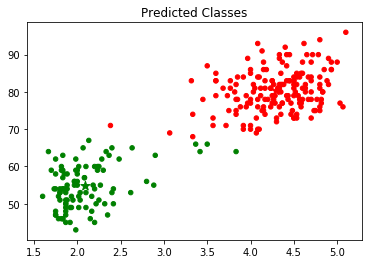

In [50]:
def kmeans(a, k, s = 20, eps = 1e-05): 
    i = 0
    N = a.shape[0] 
    dim = a.shape[1]
    centr = a[:k]
    centr_tmp = np.zeros((k, dim))
    a = np.expand_dims(a, axis = 1) 
    d = dim * N * np.max(a)**2 
    d1 = 0
    
    while d1 - d > eps or i < s:
        d1 = d
        centr_tmp = centr
        
        numcentr = np.argmin(((a - centr) ** 2).sum(axis = 2), axis = 1) 
        C = np.zeros(N * k * dim).reshape(N, k, dim)
        C[np.arange(N), numcentr, :] = (a - centr)[np.arange(N),  numcentr, :] / np.bincount(numcentr)[numcentr].reshape(N, 1)
        centr = centr_tmp + np.squeeze(C.sum(axis = 0))        

        numcentr = np.argmin(((a - centr) ** 2).sum(axis = 2), axis = 1)
        C = np.zeros(N * k * dim).reshape(N, k, dim)
        C[np.arange(N), numcentr, :] = (a - centr)[np.arange(N),  numcentr, :]
        d = np.sqrt((C ** 2).sum(axis = 2)).sum(axis = 1).mean()         
        i = i + 1
        
    return centr, d
def get_labels(pts, centroids):
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

import matplotlib.pyplot as plt
data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
centroids = kmeans(data, 2)[0]
labels = get_labels(data, centroids)
plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()

In [47]:
centroids

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0])